# **Project On pySpark + pandas + Matplotlib**

In [6]:
!wget -O police-stations.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD

--2022-09-23 14:08:16--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.140.205, 52.206.68.26
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police-stations.csv’

police-stations.csv     [ <=>                ]   5.57K  --.-KB/s    in 0s      

2022-09-23 14:08:17 (529 MB/s) - ‘police-stations.csv’ saved [5699]



**Infrastructure Installation:**

## Install Spark

In [190]:
!date

Fri Sep 23 10:10:22 UTC 2022


In [3]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [92.1 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.laun

In [4]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

In [7]:
!ls

police-stations.csv  spark-2.3.1-bin-hadoop2.7
sample_data	     spark-2.3.1-bin-hadoop2.7.tgz


In [8]:
import findspark
findspark.init()
from pyspark import SparkContext

sc = SparkContext.getOrCreate()
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [9]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

**Data filtering and Manupulation:**

In [39]:
df = spark.read.format("csv").option("inferschema", "true").option("header", "true").load("/content/crimes_2001_to_present.csv")

In [40]:
df.count()

391275

In [41]:
df.select('ID','Case Number', 'Date', 'Block').show(5)

+--------+-----------+--------------------+--------------------+
|      ID|Case Number|                Date|               Block|
+--------+-----------+--------------------+--------------------+
|10224738|   HY411648|09/05/2015 01:30:...|     043XX S WOOD ST|
|10224739|   HY411615|09/04/2015 11:30:...| 008XX N CENTRAL AVE|
|11646166|   JC213529|09/01/2018 12:01:...|082XX S INGLESIDE...|
|10224740|   HY411595|09/05/2015 12:45:...|   035XX W BARRY AVE|
|10224741|   HY411610|09/05/2015 01:00:...| 0000X N LARAMIE AVE|
+--------+-----------+--------------------+--------------------+
only showing top 5 rows



Importing lit package from pyspark

In [42]:
from pyspark.sql.functions import lit

In [43]:
df.withColumn('One', lit('default')).withColumn('Two', lit('default')).show(5)

+--------+-----------+--------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------------------------+---------+---------------+-------------+-----+----------------------+----------------+------------+-------+-------+
|      ID|Case Number|                Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|Historical Wards 2003-2015|Zip Codes|Community Areas|Census Tracts|Wards|Boundaries - ZIP Codes|Police Districts|Police Beats|    One|    Two|
+--------+-----------+--------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+---

Removing a data column IUCR

In [44]:
df.drop('IUCR').show(5)

+--------+-----------+--------------------+--------------------+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------------------------+---------+---------------+-------------+-----+----------------------+----------------+------------+
|      ID|Case Number|                Date|               Block|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|Historical Wards 2003-2015|Zip Codes|Community Areas|Census Tracts|Wards|Boundaries - ZIP Codes|Police Districts|Police Beats|
+--------+-----------+--------------------+--------------------+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------

operation of rows:

In [45]:
df.select('Case Number').distinct().show(5)

+-----------+
|Case Number|
+-----------+
|   HY411648|
|   HY410651|
|   HY411723|
|   HY412200|
|   HY412183|
+-----------+
only showing top 5 rows



**Filtering data on condition:**
**Check for particular date crime report.** 

In [46]:
from pyspark.sql.functions import to_timestamp, col, lit, regexp_replace


In [47]:
one_day_crime = df.withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-12'))
two_day= one_day_crime.orderBy('Date').na.fill(value=0)



**Questions to answer from the dataset:**

**Q1. What percentage of reported crimes resulted in an arrest?**

In [48]:
df.select('Arrest').distinct().show()

+------+
|Arrest|
+------+
|  true|
| false|
+------+



In [49]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Historical Wards 2003-2015: integer (nullable = true)
 |-- Zip Codes: integer (nullable = tr

In [50]:
df.filter(col('Arrest') == 'true').count() / df.select('Arrest').count()

0.2131084275765127

**Q2. What are the top 3 locations for reported crimes?**

In [51]:
df.groupBy('Location Description').count().show()

+--------------------+-----+
|Location Description|count|
+--------------------+-----+
|AIRPORT TERMINAL ...|  256|
|VEHICLE - COMMERCIAL|    2|
|POLICE FACILITY/V...| 1137|
|RESIDENCE - YARD ...|   46|
|CHA PARKING LOT /...|    3|
|            SIDEWALK|37063|
|AIRPORT TERMINAL ...|   14|
|OTHER RAILROAD PR...|    4|
|CTA GARAGE / OTHE...|  347|
|            CAR WASH|  169|
|    AIRPORT/AIRCRAFT|   90|
|MEDICAL/DENTAL OF...|  395|
|    FEDERAL BUILDING|   70|
|         CTA STATION| 1097|
|SCHOOL, PUBLIC, G...| 1597|
|SPORTS ARENA/STADIUM|  485|
|VEHICLE - OTHER R...|    6|
|            CEMETARY|   16|
|SCHOOL, PRIVATE, ...|  841|
|TAVERN / LIQUOR S...|    4|
+--------------------+-----+
only showing top 20 rows



In [52]:
df.groupBy('Location Description').count().orderBy('count', ascending=False).show()

+--------------------+-----+
|Location Description|count|
+--------------------+-----+
|              STREET|87905|
|           RESIDENCE|65193|
|           APARTMENT|50801|
|            SIDEWALK|37063|
|               OTHER|15907|
|PARKING LOT/GARAG...|11674|
|  SMALL RETAIL STORE| 8585|
|RESIDENTIAL YARD ...| 8402|
|          RESTAURANT| 7943|
|               ALLEY| 7800|
|    RESIDENCE-GARAGE| 7595|
|VEHICLE NON-COMME...| 6888|
|RESIDENCE PORCH/H...| 6787|
|    DEPARTMENT STORE| 6069|
|SCHOOL, PUBLIC, B...| 5205|
|  GROCERY FOOD STORE| 4534|
|         GAS STATION| 4521|
|       PARK PROPERTY| 3306|
|       BAR OR TAVERN| 2603|
|   CONVENIENCE STORE| 2303|
+--------------------+-----+
only showing top 20 rows



**Q3. What is the most frequently reported non-criminal activity?**

In [63]:
df.cache()

DataFrame[ID: int, Case Number: string, Date: string, Block: string, IUCR: string, Primary Type: string, Description: string, Location Description: string, Arrest: boolean, Domestic: boolean, Beat: int, District: int, Ward: int, Community Area: int, FBI Code: string, X Coordinate: int, Y Coordinate: int, Year: int, Updated On: string, Latitude: double, Longitude: double, Location: string, Historical Wards 2003-2015: int, Zip Codes: int, Community Areas: int, Census Tracts: int, Wards: int, Boundaries - ZIP Codes: int, Police Districts: int, Police Beats: int]

In [64]:
df.groupBy('Primary Type').count().orderBy('Primary Type', ascending=False).show(40)

+--------------------+-----+
|        Primary Type|count|
+--------------------+-----+
|   WEAPONS VIOLATION| 5157|
|               THEFT|88366|
|            STALKING|  230|
|         SEX OFFENSE| 1506|
|             ROBBERY|16842|
|PUBLIC PEACE VIOL...| 2711|
|    PUBLIC INDECENCY|   18|
|        PROSTITUTION| 1355|
|       OTHER OFFENSE|25387|
|OTHER NARCOTIC VI...|    4|
|OFFENSE INVOLVING...| 3421|
|           OBSCENITY|   79|
|NON-CRIMINAL (SUB...|    2|
|        NON-CRIMINAL|   57|
|      NON - CRIMINAL|   13|
|           NARCOTICS|23091|
| MOTOR VEHICLE THEFT|16126|
|LIQUOR LAW VIOLATION|  366|
|          KIDNAPPING|  303|
|        INTIMIDATION|  187|
|INTERFERENCE WITH...| 1566|
|   HUMAN TRAFFICKING|   18|
|            HOMICIDE|   12|
|            GAMBLING|  338|
|  DECEPTIVE PRACTICE|26170|
|   CRIMINAL TRESPASS| 9263|
|CRIMINAL SEXUAL A...|   51|
|     CRIMINAL DAMAGE|45586|
| CRIM SEXUAL ASSAULT| 2183|
|CONCEALED CARRY L...|   52|
|            BURGLARY|21022|
|             

In [67]:
noncriminal = df.filter((col('Primary Type') == 'NON-CRIMINAL')|(col('Primary Type') == 'NON - CRIMINAL')|(col('Primary Type') == 'NON-CRIMINAL (SUBJECT SPECIFIED)'))
noncriminal.show(20)

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------------------------+---------+---------------+-------------+-----+----------------------+----------------+------------+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|Historical Wards 2003-2015|Zip Codes|Community Areas|Census Tracts|Wards|Boundaries - ZIP Codes|Police Districts|Police Beats|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+--

In [70]:
noncriminal.groupBy(col ('Description')).count().orderBy('count', ascending=False).show(40)

+--------------------+-----+
|         Description|count|
+--------------------+-----+
|       LOST PASSPORT|   39|
|   FOID - REVOCATION|   27|
|NOTIFICATION OF S...|    2|
|NOTIFICATION OF C...|    2|
|CONCEALED CARRY L...|    1|
|      FOUND PASSPORT|    1|
+--------------------+-----+



***Q4. Using a bar chart, plot which day of the week has the most number of reported crime. ***

In [91]:
from pyspark.sql.functions import dayofweek

In [83]:
help(dayofweek)

Help on function dayofweek in module pyspark.sql.functions:

dayofweek(col)
    Extract the day of the week of a given date as integer.
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(dayofweek('dt').alias('day')).collect()
    [Row(day=4)]
    
    .. versionadded:: 2.3



In [137]:
df.select(col('Date'), dayofweek(col('Date')), date_format(col('Date'),'E')).show(truncate=False)

+----------------------+---------------+--------------------+
|Date                  |dayofweek(Date)|date_format(Date, E)|
+----------------------+---------------+--------------------+
|09/05/2015 01:30:00 PM|null           |null                |
|09/04/2015 11:30:00 AM|null           |null                |
|09/01/2018 12:01:00 AM|null           |null                |
|09/05/2015 12:45:00 PM|null           |null                |
|09/05/2015 01:00:00 PM|null           |null                |
|09/05/2015 10:55:00 AM|null           |null                |
|09/04/2015 06:00:00 PM|null           |null                |
|09/05/2015 01:00:00 PM|null           |null                |
|09/05/2015 11:30:00 AM|null           |null                |
|05/01/2016 12:25:00 AM|null           |null                |
|09/05/2015 02:00:00 PM|null           |null                |
|09/05/2015 11:00:00 AM|null           |null                |
|09/05/2015 03:00:00 AM|null           |null                |
|09/05/2

In [147]:
from pyspark.sql.functions import to_timestamp, date_format, date_trunc
df.select(col('Date'), dayofweek(to_timestamp("Date","MM/dd/yyyy hh:mm:ss a")).alias("NumericDAY"),date_format(to_timestamp("Date","MM/dd/yyyy hh:mm:ss a"),'E').alias("Days")).show()

+--------------------+----------+----+
|                Date|NumericDAY|Days|
+--------------------+----------+----+
|09/05/2015 01:30:...|         7| Sat|
|09/04/2015 11:30:...|         6| Fri|
|09/01/2018 12:01:...|         7| Sat|
|09/05/2015 12:45:...|         7| Sat|
|09/05/2015 01:00:...|         7| Sat|
|09/05/2015 10:55:...|         7| Sat|
|09/04/2015 06:00:...|         6| Fri|
|09/05/2015 01:00:...|         7| Sat|
|09/05/2015 11:30:...|         7| Sat|
|05/01/2016 12:25:...|         1| Sun|
|09/05/2015 02:00:...|         7| Sat|
|09/05/2015 11:00:...|         7| Sat|
|09/05/2015 03:00:...|         7| Sat|
|09/05/2015 12:50:...|         7| Sat|
|09/03/2015 01:00:...|         5| Thu|
|09/05/2015 11:45:...|         7| Sat|
|09/05/2015 01:30:...|         7| Sat|
|07/08/2015 12:00:...|         4| Wed|
|09/05/2015 09:55:...|         7| Sat|
|09/05/2015 12:35:...|         7| Sat|
+--------------------+----------+----+
only showing top 20 rows



In [149]:
df.groupBy(date_format(to_timestamp("Date","MM/dd/yyyy hh:mm:ss a"),'E').alias("Days")).count().orderBy('count', ascending=False).show()

+----+-----+
|Days|count|
+----+-----+
| Fri|58545|
| Sat|56169|
| Mon|56153|
| Thu|55671|
| Sun|55374|
| Wed|54760|
| Tue|54603|
+----+-----+



In [151]:
df.groupBy(date_format(to_timestamp("Date","MM/dd/yyyy hh:mm:ss a"),'E').alias("Days")).count().collect()

[Row(Days='Sun', count=55374),
 Row(Days='Mon', count=56153),
 Row(Days='Thu', count=55671),
 Row(Days='Sat', count=56169),
 Row(Days='Wed', count=54760),
 Row(Days='Fri', count=58545),
 Row(Days='Tue', count=54603)]

**List comprehension:**

In [152]:
dayoweek =  [x[0] for x in df.groupBy(date_format(to_timestamp("Date","MM/dd/yyyy hh:mm:ss a"),'E').alias("Days")).count().collect() ]
dayoweek

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Fri', 'Tue']

In [154]:
count_1 = [x[1] for x in df.groupBy(date_format(to_timestamp("Date","MM/dd/yyyy hh:mm:ss a"),'E').alias("Days")).count().collect() ]
count_1

[55374, 56153, 55671, 56169, 54760, 58545, 54603]

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

In [175]:
cp = pd.DataFrame({'day_of_week' :  dayoweek, 'count':count_1})
cp.head(7)

,day_of_week,count
0,Sun,55374
1,Mon,56153
2,Thu,55671
3,Sat,56169
4,Wed,54760
5,Fri,58545
6,Tue,54603


Text(0.5, 1.0, 'No. of crimes per day a week')

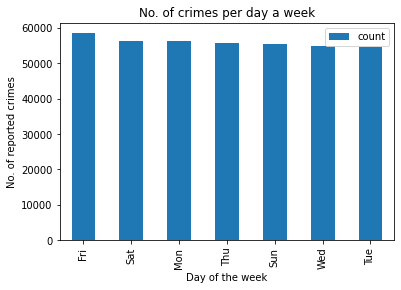

In [186]:
cp.sort_values('count', ascending=False).plot( kind='bar', x='day_of_week', y='count')
plt.xlabel("Day of the week")
plt.ylabel("No. of reported crimes")
plt.title("No. of crimes per day a week")


**Working with RDD's:**

In [2]:
!ls -l

total 12
-rw-r--r-- 1 root root 5699 Aug 19  2019 police-stations.csv
drwxr-xr-x 1 root root 4096 Sep 14 13:44 sample_data


In [13]:
psrdd = sc.textFile("/content/police-stations.csv")
psrdd_header = psrdd.first()

In [14]:
ps_rest = psrdd.filter(lambda line: line!= psrdd_header)
ps_rest.first()

'Headquarters,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,http://home.chicagopolice.org,,,,1177731.401,1881697.404,41.83070169,-87.62339535,"(41.8307016873, -87.6233953459)"'

**Display the Poice station count:**

In [28]:
ps_rest.map(lambda line: line.split(',')).count()

24

**Display the district_ID, District_name, Address and zip for the Police Station with District ID 7**

In [20]:
psrdd.first()

'DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION'

In [30]:
(ps_rest.filter(lambda line: line.split(',')[0] == '7').
 map(lambda line: (line.split(',')[0],
                   line.split(',')[1],
                   line.split(',')[2],
                   line.split(',')[5]
                  )).collect())
                                                        


[('7', 'Englewood', '1438 W 63rd St', '60636')]

**Police stations 10 and 11 are geographically close to each other. Display the District ID, District name, address and zip code**

In [35]:
(ps_rest.filter(lambda line: line.split(',')[0] in ['10','11']).
    map(lambda line: (line.split(',')[0],
                   line.split(',')[1],
                   line.split(',')[2],
                   line.split(',')[5]
                  )).collect())

[('10', 'Ogden', '3315 W Ogden Ave', '60623'),
 ('11', 'Harrison', '3151 W Harrison St', '60612')]